Dados

In [3]:
url = 'https://raw.githubusercontent.com/Mirlaa/regressao-arvores/main/dados_curso/entregas.csv'
url_teste = 'https://raw.githubusercontent.com/Mirlaa/regressao-arvores/main/dados_curso/teste_entregas.csv'

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(url)
data

,id_cliente,nome_artista,reputacao_artista,altura,largura,peso,material,preco_escultura,preco_base_envio,internacional,envio_expresso,instalacao_incluida,transporte,fragil,pedido_extra_cliente,localizacao_remota,data_agendada,data_entrega,custo
0,e9dff114-bc2b-47e9-9f5c-669e32ad9bbe,Billy Jenkins,0.26000,5.1816,1.8288,1872.427776,Latão,73027.5,85.4175,Sim,Sim,Não,Aéreo,Não,Sim,Não,07/06/19,03/06/19,1487.2725
1,ba3b707f-b123-4eec-93f4-1fbebfe72b68,Jean Bryant,0.28000,0.9144,0.9144,27.669112,Latão,35857.5,78.7500,Não,Não,Não,Rodoviário,Não,Sim,Não,06/03/21,05/03/21,839.7900
2,c4212086-3e22-489e-bc2e-0d5092ef0526,Laura Miller,0.07000,2.4384,1.5240,107.501304,Argila,26040.0,111.1950,Não,Não,Não,Rodoviário,Sim,Sim,Sim,09/03/19,08/03/19,810.0225
3,fec1bee9-44cf-498f-a849-5e5e2cab062b,Robert Chaires,0.12000,2.7432,2.4384,1407.042384,Alumínio,30502.5,85.6275,Não,Não,Não,Não especificado,Não,Não,Sim,24/05/19,20/05/19,846.0900
4,f9f2ed8c-7f56-4e69-a80e-cb01d0a711da,Rosalyn Krol,0.15000,5.1816,1.8288,146.963808,Alumínio,16695.0,62.6850,Sim,Sim,Sim,Aéreo,Não,Sim,Não,18/12/20,14/12/20,835.9575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,d692e37c-8047-468e-ba60-89b977158662,Phil Wilson,0.93000,6.0960,2.4384,294.381208,Alumínio,25462.5,130.0950,Sim,Não,Sim,Aquaviário,Não,Sim,Não,23/03/19,27/03/19,3923.9550
4458,2671f714-e85d-46c9-a53a-7bca8d61a2cb,Berry Simmons,0.67000,3.9624,2.4384,215.456200,Alumínio,19162.5,67.8825,Sim,Não,Sim,Rodoviário,Não,Sim,Não,28/10/22,27/10/22,1546.7550
4459,e1004685-9047-4f34-9103-57d900716936,William Curry,0.46185,3.9624,2.4384,69.853168,Madeira,27982.5,68.2500,Não,Sim,Não,Aéreo,Não,Não,Não,16/03/21,16/03/21,916.4925
4460,a380ff88-2c96-4d70-919a-af0bc8caeed7,Karen Bayles,0.45000,6.0960,8.5344,4921.926792,Alumínio,161857.5,355.4250,Não,Não,Sim,Rodoviário,Não,Sim,Não,19/04/20,21/04/20,5653.4625


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            4462 non-null   object 
 1   nome_artista          4462 non-null   object 
 2   reputacao_artista     4462 non-null   float64
 3   altura                4462 non-null   float64
 4   largura               4462 non-null   float64
 5   peso                  4462 non-null   float64
 6   material              4462 non-null   object 
 7   preco_escultura       4462 non-null   float64
 8   preco_base_envio      4462 non-null   float64
 9   internacional         4462 non-null   object 
 10  envio_expresso        4462 non-null   object 
 11  instalacao_incluida   4462 non-null   object 
 12  transporte            4462 non-null   object 
 13  fragil                4462 non-null   object 
 14  pedido_extra_cliente  4462 non-null   object 
 15  localizacao_remota   

In [7]:
df = data.copy()

In [8]:
df['data_agendada'] = pd.to_datetime(df['data_agendada'], format='%d/%m/%y')
df['data_entrega'] = pd.to_datetime(df['data_entrega'], format='%d/%m/%y')

In [9]:
df['diferenca_entrega'] = (df['data_entrega'] - df['data_agendada']).dt.days
df['diferenca_entrega']

0      -4
1      -1
2      -1
3      -4
4      -4
       ..
4457    4
4458   -1
4459    0
4460    2
4461   -1
Name: diferenca_entrega, Length: 4462, dtype: int64

In [10]:
df['data_agendada_dias'] = df['data_agendada'].dt.day
df['data_agendada_mes'] = df['data_agendada'].dt.month
df['data_agendada_ano'] = df['data_agendada'].dt.year

In [11]:
df['data_entrega_dias'] = df['data_entrega'].dt.day
df['data_entrega_mes'] = df['data_entrega'].dt.month
df['data_entrega_ano'] = df['data_entrega'].dt.year

In [12]:
df.drop(['data_agendada', 'data_entrega'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            4462 non-null   object 
 1   nome_artista          4462 non-null   object 
 2   reputacao_artista     4462 non-null   float64
 3   altura                4462 non-null   float64
 4   largura               4462 non-null   float64
 5   peso                  4462 non-null   float64
 6   material              4462 non-null   object 
 7   preco_escultura       4462 non-null   float64
 8   preco_base_envio      4462 non-null   float64
 9   internacional         4462 non-null   object 
 10  envio_expresso        4462 non-null   object 
 11  instalacao_incluida   4462 non-null   object 
 12  transporte            4462 non-null   object 
 13  fragil                4462 non-null   object 
 14  pedido_extra_cliente  4462 non-null   object 
 15  localizacao_remota   

## Tratando valores categóricos

In [14]:
colunas_categoricas = ['id_cliente', 'nome_artista', 'material', 'internacional', 
                       'envio_expresso', 'instalacao_incluida', 'transporte', 'fragil', 
                       'pedido_extra_cliente','localizacao_remota']

for column in colunas_categoricas:
    unicos = df[column].unique()
    print(f"Valores únicos na coluna '{column}' \n {len(unicos)} valores:")
    print(unicos)
    print('=='*45)


Valores únicos na coluna 'id_cliente' 
 4462 valores:
['e9dff114-bc2b-47e9-9f5c-669e32ad9bbe'
 'ba3b707f-b123-4eec-93f4-1fbebfe72b68'
 'c4212086-3e22-489e-bc2e-0d5092ef0526' ...
 'e1004685-9047-4f34-9103-57d900716936'
 'a380ff88-2c96-4d70-919a-af0bc8caeed7'
 '26fea648-9cc1-4a2b-9458-0b2d35957803']
Valores únicos na coluna 'nome_artista' 
 4441 valores:
['Billy Jenkins' 'Jean Bryant' 'Laura Miller' ... 'William Curry'
 'Karen Bayles' 'Denise Worth']
Valores únicos na coluna 'material' 
 8 valores:
['Latão' 'Argila' 'Alumínio' 'Madeira' 'Bronze' 'Pedra' 'Não especificado'
 'Mármore']
Valores únicos na coluna 'internacional' 
 2 valores:
['Sim' 'Não']
Valores únicos na coluna 'envio_expresso' 
 2 valores:
['Sim' 'Não']
Valores únicos na coluna 'instalacao_incluida' 
 2 valores:
['Não' 'Sim']
Valores únicos na coluna 'transporte' 
 4 valores:
['Aéreo' 'Rodoviário' 'Não especificado' 'Aquaviário']
Valores únicos na coluna 'fragil' 
 2 valores:
['Não' 'Sim']
Valores únicos na coluna 'pedido_

Transformação One-Hot Encoding

O one-hot encoding é uma técnica fundamental para o treinamento de modelos de machine learning, especialmente quando lidamos com dados categóricos. Ele serve para converter variáveis categóricas, que são representadas por texto, em uma forma que os algoritmos de aprendizado de máquina possam entender e processar.

Aqui estão algumas razões pelas quais o one-hot encoding é importante:

Transformação de Dados Categóricos: Os modelos de machine learning geralmente trabalham com dados numéricos. O one-hot encoding transforma categorias em colunas binárias, onde cada coluna representa uma categoria única. Isso permite que o modelo utilize essas informações de forma eficaz.

Evita a Ordem Inadequada: Quando usamos números inteiros para representar categorias (por exemplo, 1 para "Sim" e 0 para "Não"), isso pode criar uma falsa impressão de que há uma ordem ou relação entre essas categorias. O one-hot encoding evita isso, pois cada categoria é representada de forma independente.

Captura de Padrões: Ao transformar categorias em colunas binárias, o modelo pode identificar padrões e relações entre as variáveis de forma mais eficiente. Isso é especialmente útil em modelos que dependem de relações entre variáveis para fazer previsões.

Melhora a Performance do Modelo: Com dados adequadamente codificados, o modelo pode aprender melhor e, consequentemente, ter um desempenho superior nas previsões.

In [15]:
categoricas = ['material', 'internacional',  'envio_expresso', 
                       'instalacao_incluida', 'transporte', 'fragil', 
                       'pedido_extra_cliente','localizacao_remota']

df = pd.get_dummies(df, columns=categoricas, 
                    prefix = categoricas, drop_first=True)

In [16]:
df.drop(['id_cliente', 'nome_artista'], axis=1, inplace=True)

In [17]:
df

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,custo,diferenca_entrega,data_agendada_dias,data_agendada_mes,...,material_Pedra,internacional_Sim,envio_expresso_Sim,instalacao_incluida_Sim,transporte_Aéreo,transporte_Não especificado,transporte_Rodoviário,fragil_Sim,pedido_extra_cliente_Sim,localizacao_remota_Sim
0,0.26000,5.1816,1.8288,1872.427776,73027.5,85.4175,1487.2725,-4,7,6,...,False,True,True,False,True,False,False,False,True,False
1,0.28000,0.9144,0.9144,27.669112,35857.5,78.7500,839.7900,-1,6,3,...,False,False,False,False,False,False,True,False,True,False
2,0.07000,2.4384,1.5240,107.501304,26040.0,111.1950,810.0225,-1,9,3,...,False,False,False,False,False,False,True,True,True,True
3,0.12000,2.7432,2.4384,1407.042384,30502.5,85.6275,846.0900,-4,24,5,...,False,False,False,False,False,True,False,False,False,True
4,0.15000,5.1816,1.8288,146.963808,16695.0,62.6850,835.9575,-4,18,12,...,False,True,True,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,0.93000,6.0960,2.4384,294.381208,25462.5,130.0950,3923.9550,4,23,3,...,False,True,False,True,False,False,False,False,True,False
4458,0.67000,3.9624,2.4384,215.456200,19162.5,67.8825,1546.7550,-1,28,10,...,False,True,False,True,False,False,True,False,True,False
4459,0.46185,3.9624,2.4384,69.853168,27982.5,68.2500,916.4925,0,16,3,...,False,False,True,False,True,False,False,False,False,False
4460,0.45000,6.0960,8.5344,4921.926792,161857.5,355.4250,5653.4625,2,19,4,...,False,False,False,True,False,False,True,False,True,False


In [18]:
# Gráfico de distribuição de valores de custo da entrega.
import matplotlib.pyplot as plt
import seaborn as sns

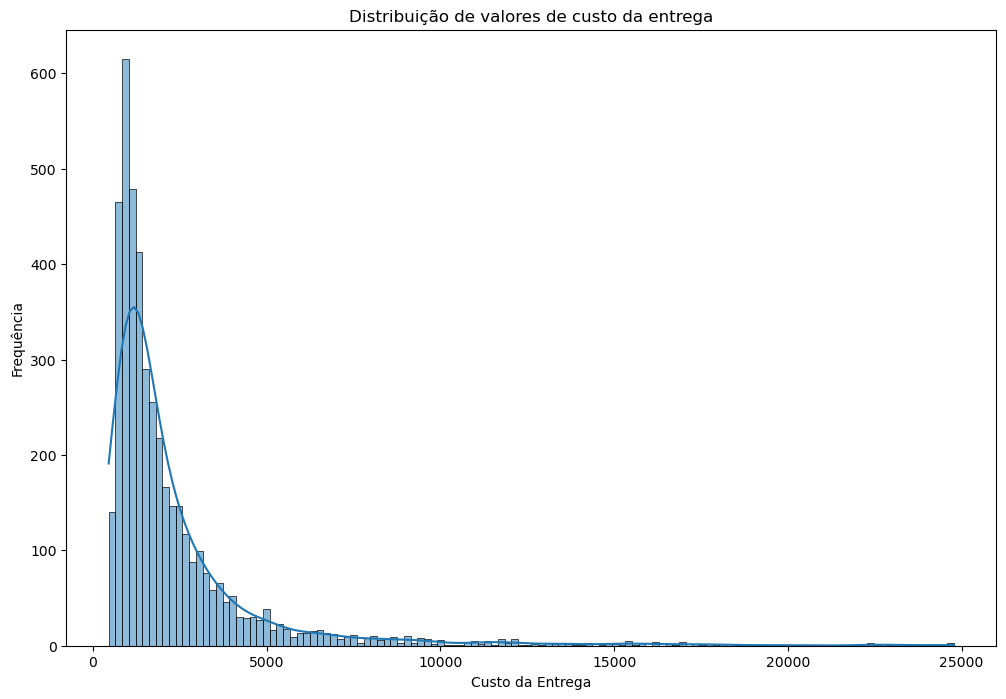

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(df['custo'], kde=True)
plt.title('Distribuição de valores de custo da entrega')
plt.xlabel('Custo da Entrega')
plt.ylabel('Frequência')

plt.show()

Relação entre peso das esculturas e o custo.
Um gráfico de dispersão entre o peso (peso) e o custo (custo) pode mostrar como o peso afeta o custo. A árvore de regressão será capaz de capturar relações não lineares, então podemos observar se há padrões complexos.

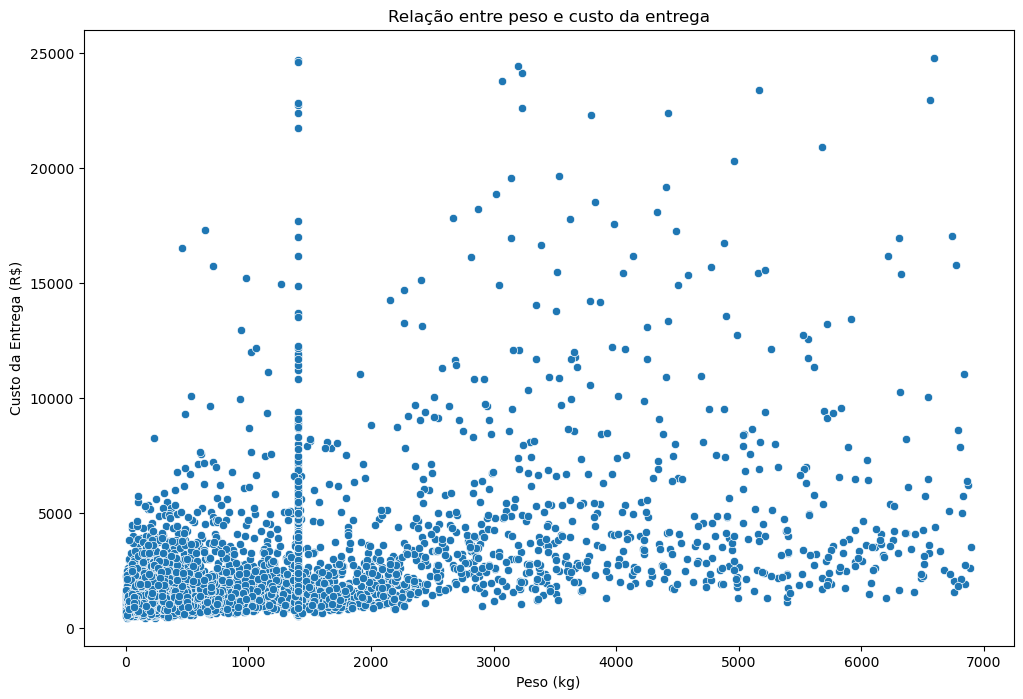

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='peso', y='custo', data=df)
plt.title('Relação entre peso e custo da entrega')
plt.xlabel('Peso (kg)')
plt.ylabel('Custo da Entrega (R$)')
plt.show()

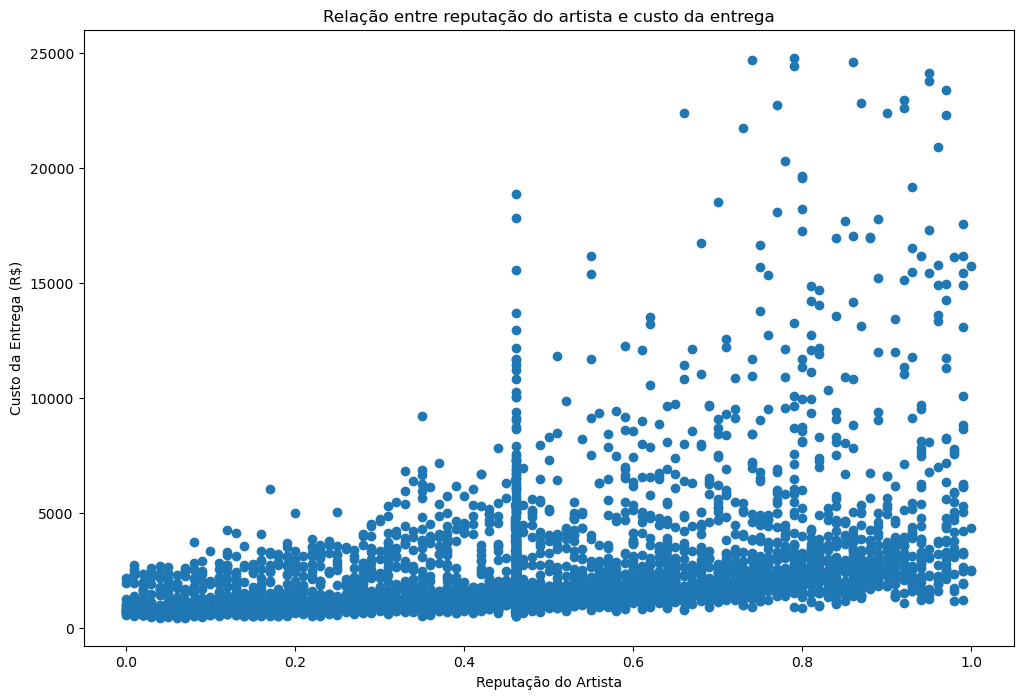

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(x='reputacao_artista', y = 'custo', data=df)
plt.title('Relação entre reputação do artista e custo da entrega')
plt.xlabel('Reputação do Artista')
plt.ylabel('Custo da Entrega (R$)')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

x = df.drop('custo', axis=1)

y = df['custo']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=45)

In [23]:
len(x_treino), len(x_teste)

(3569, 893)

In [24]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor(random_state=45)
modelo.fit(x_treino, y_treino)

DecisionTreeRegressor(random_state=45)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

print('Métricas conjunto de treino:')
print('R²:', r2_score(y_treino, modelo.predict(x_treino)))
print('MAE:', mean_absolute_error(y_treino, modelo.predict(x_treino)))
print('RMSE:', root_mean_squared_error(y_treino, modelo.predict(x_treino)))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_teste, modelo.predict(x_teste)))
print('MAE:', mean_absolute_error(y_teste, modelo.predict(x_teste)))
print('RMSE:', root_mean_squared_error(y_teste, modelo.predict(x_teste)))

Métricas conjunto de treino:
R²: 1.0
MAE: 0.0
RMSE: 0.0


Métricas conjunto de teste:
R²: 0.6768224276483932
MAE: 682.6879535274356
RMSE: 1507.2656329983245


Overfit :D

In [26]:
print('Número de nós: ', modelo.tree_.node_count)
print('Nós:', modelo.get_n_leaves())
print('Profundidade:', modelo.get_depth())


Número de nós:  7135
Nós: 3568
Profundidade: 30


In [27]:
modelo.feature_names_in_

array(['reputacao_artista', 'altura', 'largura', 'peso',
       'preco_escultura', 'preco_base_envio', 'diferenca_entrega',
       'data_agendada_dias', 'data_agendada_mes', 'data_agendada_ano',
       'data_entrega_dias', 'data_entrega_mes', 'data_entrega_ano',
       'material_Argila', 'material_Bronze', 'material_Latão',
       'material_Madeira', 'material_Mármore',
       'material_Não especificado', 'material_Pedra', 'internacional_Sim',
       'envio_expresso_Sim', 'instalacao_incluida_Sim',
       'transporte_Aéreo', 'transporte_Não especificado',
       'transporte_Rodoviário', 'fragil_Sim', 'pedido_extra_cliente_Sim',
       'localizacao_remota_Sim'], dtype=object)

In [28]:
modelo.feature_importances_

array([2.95041770e-01, 4.31193079e-02, 3.69397723e-02, 2.60943830e-02,
       3.85409075e-01, 1.48656853e-01, 1.17369100e-02, 1.07412375e-02,
       3.03126515e-03, 2.58205905e-03, 1.13139912e-02, 3.24455816e-03,
       1.22249763e-03, 6.54720930e-04, 2.86625309e-04, 9.10796028e-04,
       1.00064336e-04, 5.15460725e-04, 6.42873761e-04, 1.01696465e-05,
       7.37647663e-04, 5.81426736e-03, 2.24288656e-03, 2.12401453e-03,
       4.22502136e-04, 3.54267795e-04, 4.12407522e-03, 1.11812842e-03,
       8.07819173e-04])

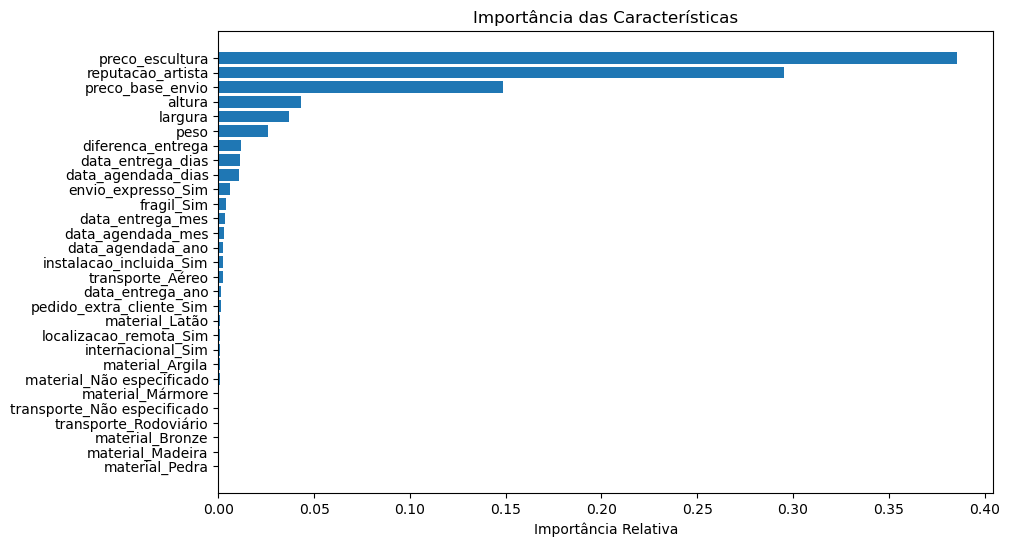

In [29]:
features_importancias = pd.DataFrame({'Feature': modelo.feature_names_in_,
                                      'Importância': modelo.feature_importances_}).sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(features_importancias['Feature'], features_importancias['Importância'])
plt.xlabel('Importância Relativa')
plt.title('Importância das Características')

plt.show()

In [37]:
parametros = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_leaf_nodes': [None, 100, 500]
    }

In [38]:
from sklearn.model_selection import GridSearchCV

modelo_grid = GridSearchCV(modelo, param_grid=parametros, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
modelo_grid.fit(x_treino, y_treino)

best = modelo_grid.best_estimator_
modelo_grid.best_params_

{'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [39]:
print('Métricas conjunto de treino:')
print('R²:', r2_score(y_treino, best.predict(x_treino)))
print('MAE:', mean_absolute_error(y_treino, best.predict(x_treino)))
print('RMSE:', root_mean_squared_error(y_treino, best.predict(x_treino)))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_teste, best.predict(x_teste)))
print('MAE:', mean_absolute_error(y_teste, best.predict(x_teste)))
print('RMSE:', root_mean_squared_error(y_teste, best.predict(x_teste)))

Métricas conjunto de treino:
R²: 0.8709496124958277
MAE: 473.7084817751579
RMSE: 980.4175958553703


Métricas conjunto de teste:
R²: 0.7539395249935403
MAE: 586.8626071994394
RMSE: 1315.194908266438


In [45]:
from sklearn.model_selection import cross_validate, KFold

cv_estrategias = KFold(n_splits=3, shuffle=True, random_state=45)

resultados = cross_validate(best, x, y, cv=cv_estrategias, 
                            scoring='neg_mean_squared_error', return_train_score=True)

In [46]:
treino_rsme = np.sqrt(-resultados['train_score'])
teste_rsme = np.sqrt(-resultados['test_score'])

print("Treino RSME:", treino_rsme)
print("Teste RSME:", teste_rsme)
print("Média do RSME no treino:", treino_rsme.mean())
print("Média do RSME no teste:", teste_rsme.mean())

Treino RSME: [1061.33787095  985.34242721 1023.82861998]
Teste RSME: [1359.22520081 1469.19123426 1424.79371964]
Média do RSME no treino: 1023.5029727125925
Média do RSME no teste: 1417.7367182339888


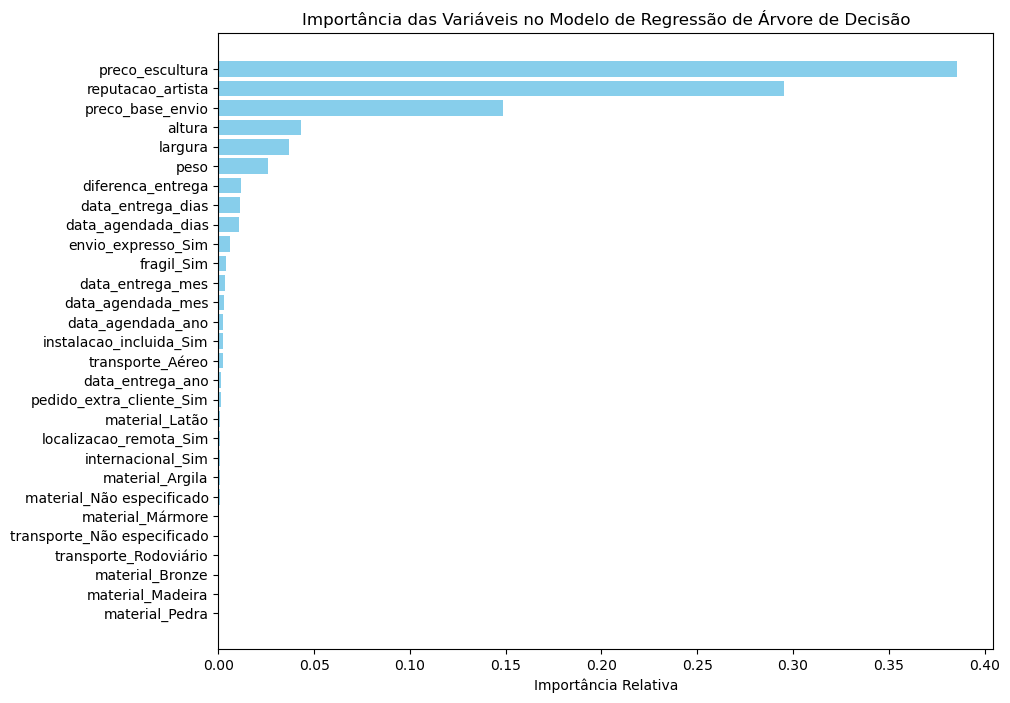

In [48]:
features_importancias = features_importancias.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(features_importancias['Feature'], features_importancias['Importância'], color='skyblue')
plt.xlabel('Importância Relativa')
plt.title('Importância das Variáveis no Modelo de Regressão de Árvore de Decisão')
plt.show()

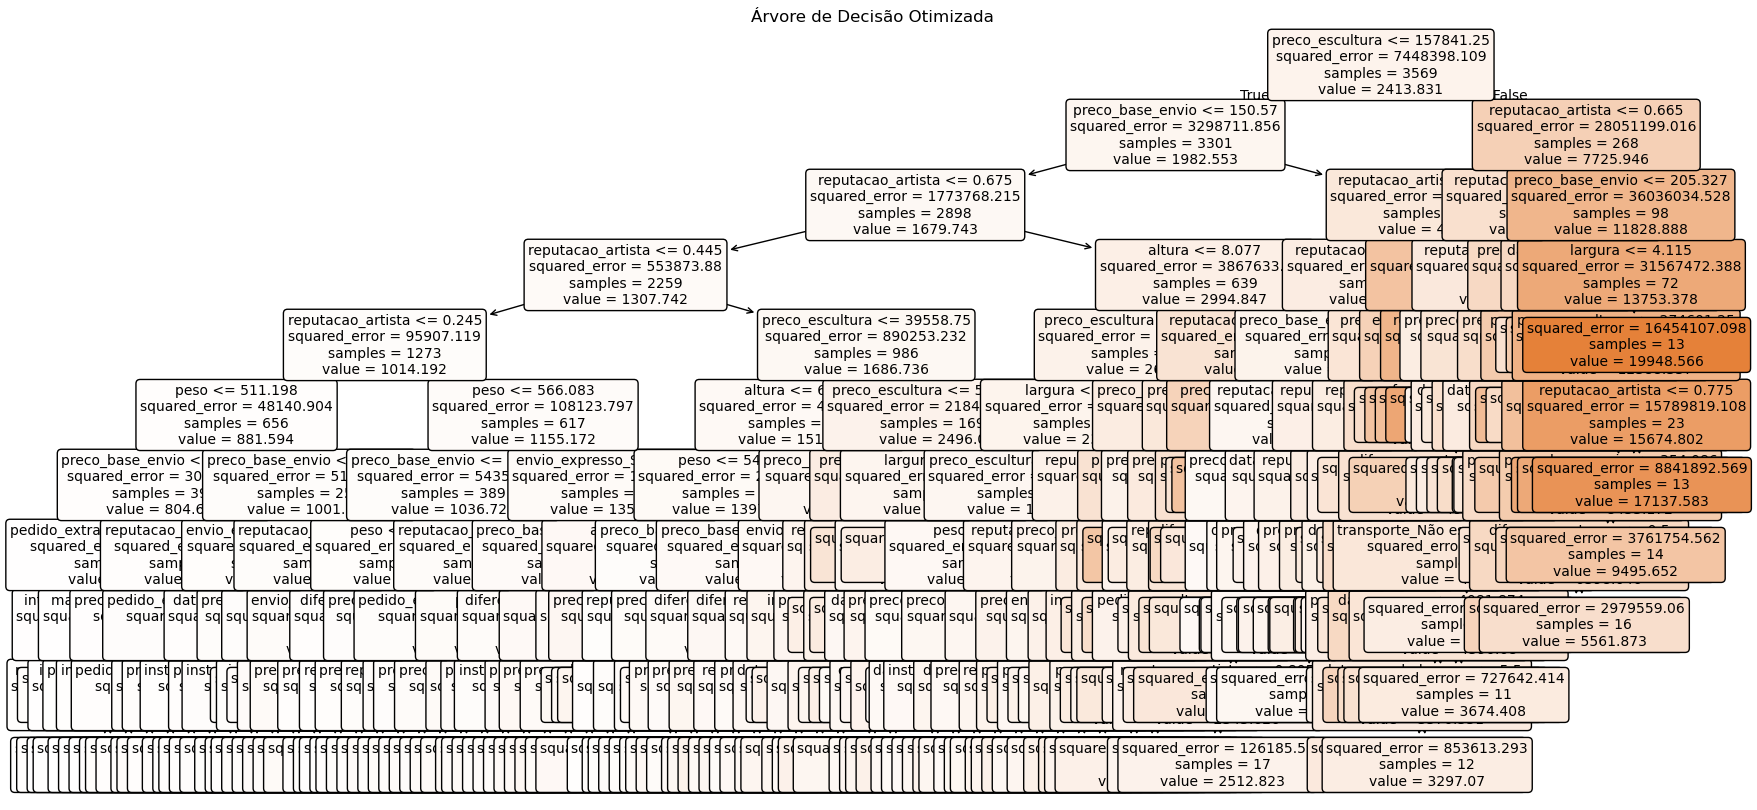

In [49]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best, feature_names=x.columns, filled=True, rounded=True, fontsize=10)
plt.title('Árvore de Decisão Otimizada')
plt.show()

## Floresta Aleatória

In [50]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=45, oob_score=True)

modelo_rf.fit(x_treino, y_treino)

RandomForestRegressor(oob_score=True, random_state=45)

In [52]:
print('Métricas conjunto de treino:')
print('R²:', r2_score(y_treino, modelo_rf.predict(x_treino)))
print('MAE:', mean_absolute_error(y_treino, modelo_rf.predict(x_treino)))
print('RMSE:', root_mean_squared_error(y_treino, modelo_rf.predict(x_treino)))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_teste, modelo_rf.predict(x_teste)))
print('MAE:', mean_absolute_error(y_teste, modelo_rf.predict(x_teste)))
print('RMSE:', root_mean_squared_error(y_teste, modelo_rf.predict(x_teste)))

print('\n\nPrevisão OOB R²:', modelo_rf.oob_score_)

Métricas conjunto de treino:
R²: 0.9773758519600008
MAE: 183.9172127206501
RMSE: 410.5041552539995


Métricas conjunto de teste:
R²: 0.8224788880212647
MAE: 463.52012368421055
RMSE: 1117.1055117958163


Previsão OOB R²: 0.8284340726706725


In [54]:
cv_estrategias = KFold(n_splits=3, shuffle=True, random_state=45)

resultados = cross_validate(modelo_rf, x, y, cv=cv_estrategias, 
                            scoring='neg_mean_squared_error', return_train_score=True)

In [55]:
treino_rsme = np.sqrt(-resultados['train_score'])
teste_rsme = np.sqrt(-resultados['test_score'])

print("Treino RSME:", treino_rsme)
print("Teste RSME:", teste_rsme)
print("Média do RSME no treino:", treino_rsme.mean())
print("Média do RSME no teste:", teste_rsme.mean())

Treino RSME: [452.54057476 416.30628771 413.12883834]
Teste RSME: [1098.22620163 1155.62491806 1188.44539055]
Média do RSME no treino: 427.3252336020258
Média do RSME no teste: 1147.4321700780329


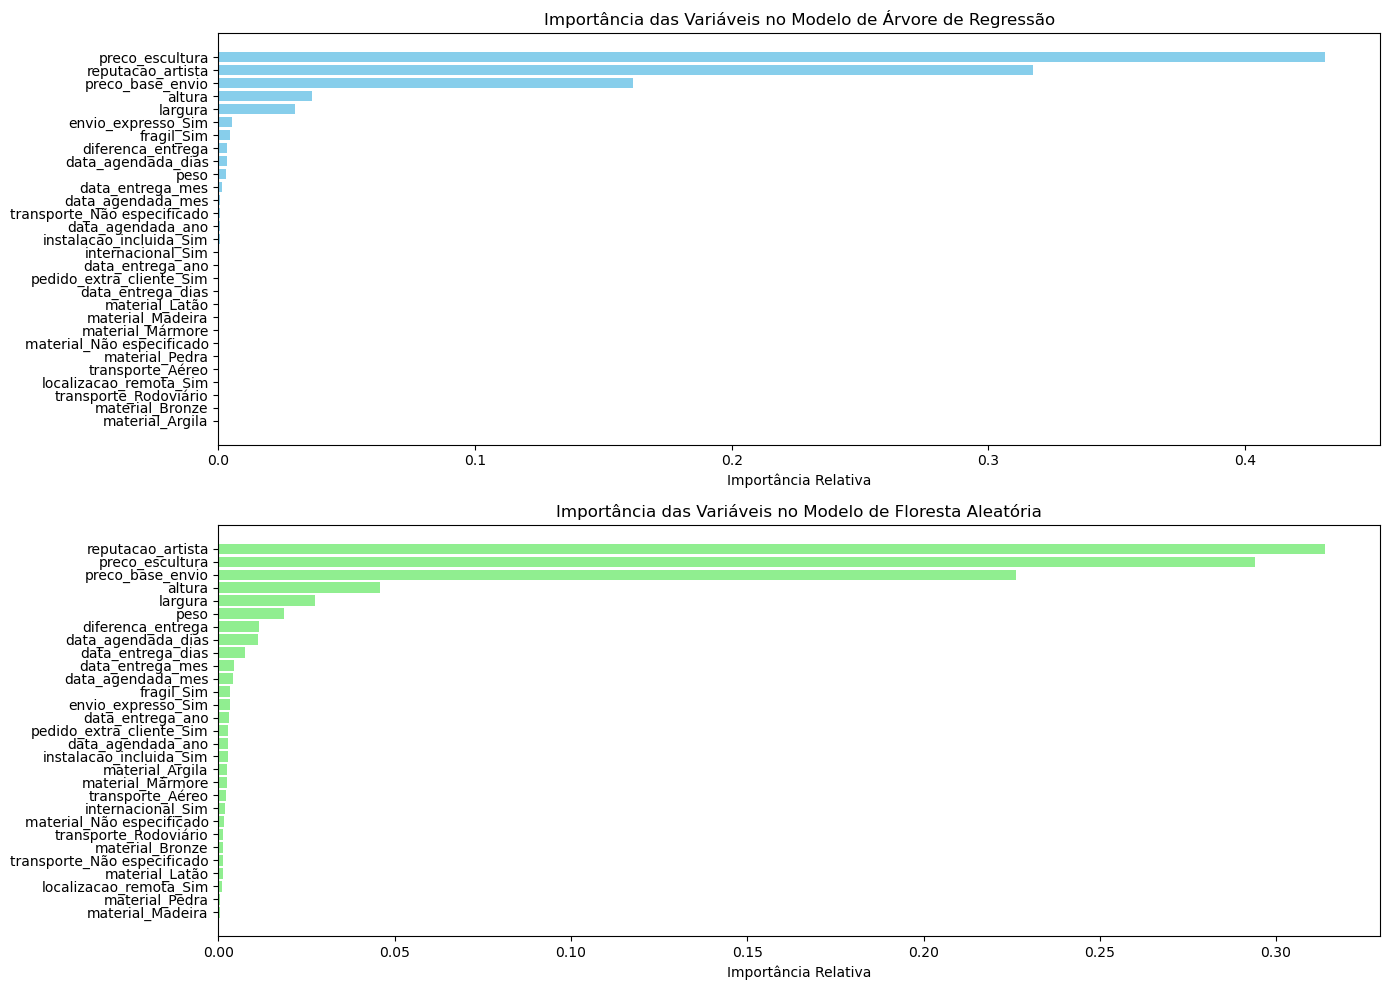

In [56]:
# Importância das variáveis no modelo de Árvore de Regressão
importancias_arvore = pd.DataFrame({'Feature': best.feature_names_in_,
                                    'Importância': best.feature_importances_}).sort_values(by='Importância', ascending=True)

# Importância das variáveis no modelo de Floresta Aleatória
importancias_floresta = pd.DataFrame({'Feature': modelo_rf.feature_names_in_,
                                      'Importância': modelo_rf.feature_importances_}).sort_values(by='Importância', ascending=True)

# Plotando as importâncias das variáveis
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.barh(importancias_arvore['Feature'], importancias_arvore['Importância'], color='skyblue')
plt.xlabel('Importância Relativa')
plt.title('Importância das Variáveis no Modelo de Árvore de Regressão')

plt.subplot(2, 1, 2)
plt.barh(importancias_floresta['Feature'], importancias_floresta['Importância'], color='lightgreen')
plt.xlabel('Importância Relativa')
plt.title('Importância das Variáveis no Modelo de Floresta Aleatória')

plt.tight_layout()
plt.show()

In [58]:
# Verificando o conjunto de árvores de regressão criados para o modelo de Floresta Aleatória
for i, tree in enumerate(modelo_rf.estimators_):
    print(f"Árvore {i+1}:")
    print(tree)
    print("="*60)

Árvore 1:
DecisionTreeRegressor(max_features=1.0, random_state=2100288459)
Árvore 2:
DecisionTreeRegressor(max_features=1.0, random_state=1307974046)
Árvore 3:
DecisionTreeRegressor(max_features=1.0, random_state=212792963)
Árvore 4:
DecisionTreeRegressor(max_features=1.0, random_state=736499580)
Árvore 5:
DecisionTreeRegressor(max_features=1.0, random_state=1208806944)
Árvore 6:
DecisionTreeRegressor(max_features=1.0, random_state=1804481119)
Árvore 7:
DecisionTreeRegressor(max_features=1.0, random_state=331956157)
Árvore 8:
DecisionTreeRegressor(max_features=1.0, random_state=1963884245)
Árvore 9:
DecisionTreeRegressor(max_features=1.0, random_state=1908981923)
Árvore 10:
DecisionTreeRegressor(max_features=1.0, random_state=1780867652)
Árvore 11:
DecisionTreeRegressor(max_features=1.0, random_state=2030694777)
Árvore 12:
DecisionTreeRegressor(max_features=1.0, random_state=2065337976)
Árvore 13:
DecisionTreeRegressor(max_features=1.0, random_state=208400399)
Árvore 14:
DecisionTreeRe

In [60]:
# Avaliando os parâmetros do modelo RandomForestRegressor
modelo_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 45,
 'verbose': 0,
 'warm_start': False}

In [65]:
parametros = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_leaf_nodes': [None, 400, 550]
}

In [66]:
grid_rf = GridSearchCV(modelo_rf, param_grid=parametros, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_rf.fit(x_treino, y_treino)

best_rf = grid_rf.best_estimator_

print('Melhores parâmetros:', grid_rf.best_params_)

Melhores parâmetros: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [67]:
print('Métricas conjunto de treino:')
print('R²:', r2_score(y_treino, best_rf.predict(x_treino)))
print('MAE:', mean_absolute_error(y_treino, best_rf.predict(x_treino)))
print('RMSE:', root_mean_squared_error(y_treino, best_rf.predict(x_treino)))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_teste, best_rf.predict(x_teste)))
print('MAE:', mean_absolute_error(y_teste, best_rf.predict(x_teste)))
print('RMSE:', root_mean_squared_error(y_teste, best_rf.predict(x_teste)))

print('\n\nPrevisão OOB R²:', best_rf.oob_score_)

Métricas conjunto de treino:
R²: 0.9667414332391446
MAE: 209.6538541677439
RMSE: 497.7178375068028


Métricas conjunto de teste:
R²: 0.8261165028007177
MAE: 451.6544938959796
RMSE: 1105.6008729898072


Previsão OOB R²: 0.833961040405656


In [68]:
cv_estrategias = KFold(n_splits=3, shuffle=True, random_state=45)

resultados = cross_validate(best_rf, x, y, cv=cv_estrategias, 
                            scoring='neg_mean_squared_error', return_train_score=True)

In [69]:
treino_rsme = np.sqrt(-resultados['train_score'])
teste_rsme = np.sqrt(-resultados['test_score'])

print("Treino RSME:", treino_rsme)
print("Teste RSME:", teste_rsme)
print("Média do RSME no treino:", treino_rsme.mean())
print("Média do RSME no teste:", teste_rsme.mean())

Treino RSME: [549.32197788 515.30613181 515.92866163]
Teste RSME: [1095.82676076 1158.23965367 1179.65386923]
Média do RSME no treino: 526.8522571080842
Média do RSME no teste: 1144.5734278855984


In [ ]:
df_novos = pd.read_csv(url_teste)
df_novos

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,diferenca_dias_entrega,data_agendada_dias,data_agendada_mes,data_agendada_ano,...,material_Argila,material_Bronze,material_Latão,material_Madeira,material_Mármore,material_Não especificado,material_Pedra,transporte_Aéreo,transporte_Não especificado,transporte_Rodoviário
0,0.67,2.1336,1.2192,48.987936,36.3300,73.2900,0,2,5,2020,...,True,False,False,False,False,False,False,False,False,True
1,0.61,1.8288,1.5240,43.998424,22.2075,71.5050,2,4,1,2022,...,False,False,False,False,False,False,False,True,False,False
2,0.14,4.5720,2.4384,343.369144,32.9700,124.8975,3,14,9,2021,...,True,False,False,False,False,False,False,False,False,True
3,0.63,3.0480,1.2192,758.859416,23.0475,93.6075,-1,3,12,2021,...,False,False,False,False,True,False,False,False,False,True
4,0.34,9.7536,1.8288,505.755080,34.9125,119.7000,4,3,2,2022,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,0.00,2.1336,1.5240,736.179816,22.6275,113.1375,-3,14,11,2021,...,False,False,False,False,True,False,False,True,False,False
1430,0.10,3.6576,1.8288,390.996304,27.7725,80.6400,0,9,12,2019,...,False,True,False,False,False,False,False,False,False,True
1431,0.20,1.2192,1.2192,9.071840,31.0800,105.5250,4,6,3,2022,...,False,False,False,False,False,False,False,False,False,True
1432,0.22,9.7536,2.4384,488.972176,27.7725,112.8225,-3,21,2,2023,...,True,False,False,False,False,False,False,False,False,False


In [88]:
df_aux = df.drop(columns=['custo'])
df_aux

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,diferenca_entrega,data_agendada_dias,data_agendada_mes,data_agendada_ano,...,material_Pedra,internacional_Sim,envio_expresso_Sim,instalacao_incluida_Sim,transporte_Aéreo,transporte_Não especificado,transporte_Rodoviário,fragil_Sim,pedido_extra_cliente_Sim,localizacao_remota_Sim
0,0.26000,5.1816,1.8288,1872.427776,73027.5,85.4175,-4,7,6,2019,...,False,True,True,False,True,False,False,False,True,False
1,0.28000,0.9144,0.9144,27.669112,35857.5,78.7500,-1,6,3,2021,...,False,False,False,False,False,False,True,False,True,False
2,0.07000,2.4384,1.5240,107.501304,26040.0,111.1950,-1,9,3,2019,...,False,False,False,False,False,False,True,True,True,True
3,0.12000,2.7432,2.4384,1407.042384,30502.5,85.6275,-4,24,5,2019,...,False,False,False,False,False,True,False,False,False,True
4,0.15000,5.1816,1.8288,146.963808,16695.0,62.6850,-4,18,12,2020,...,False,True,True,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,0.93000,6.0960,2.4384,294.381208,25462.5,130.0950,4,23,3,2019,...,False,True,False,True,False,False,False,False,True,False
4458,0.67000,3.9624,2.4384,215.456200,19162.5,67.8825,-1,28,10,2022,...,False,True,False,True,False,False,True,False,True,False
4459,0.46185,3.9624,2.4384,69.853168,27982.5,68.2500,0,16,3,2021,...,False,False,True,False,True,False,False,False,False,False
4460,0.45000,6.0960,8.5344,4921.926792,161857.5,355.4250,2,19,4,2020,...,False,False,False,True,False,False,True,False,True,False


In [89]:
df_novos.columns = df_aux.columns
df_novos

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,diferenca_entrega,data_agendada_dias,data_agendada_mes,data_agendada_ano,...,material_Pedra,internacional_Sim,envio_expresso_Sim,instalacao_incluida_Sim,transporte_Aéreo,transporte_Não especificado,transporte_Rodoviário,fragil_Sim,pedido_extra_cliente_Sim,localizacao_remota_Sim
0,0.67,2.1336,1.2192,48.987936,36.3300,73.2900,0,2,5,2020,...,True,False,False,False,False,False,False,False,False,True
1,0.61,1.8288,1.5240,43.998424,22.2075,71.5050,2,4,1,2022,...,False,False,False,False,False,False,False,True,False,False
2,0.14,4.5720,2.4384,343.369144,32.9700,124.8975,3,14,9,2021,...,True,False,False,False,False,False,False,False,False,True
3,0.63,3.0480,1.2192,758.859416,23.0475,93.6075,-1,3,12,2021,...,False,False,False,False,True,False,False,False,False,True
4,0.34,9.7536,1.8288,505.755080,34.9125,119.7000,4,3,2,2022,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,0.00,2.1336,1.5240,736.179816,22.6275,113.1375,-3,14,11,2021,...,False,False,False,False,True,False,False,True,False,False
1430,0.10,3.6576,1.8288,390.996304,27.7725,80.6400,0,9,12,2019,...,False,True,False,False,False,False,False,False,False,True
1431,0.20,1.2192,1.2192,9.071840,31.0800,105.5250,4,6,3,2022,...,False,False,False,False,False,False,False,False,False,True
1432,0.22,9.7536,2.4384,488.972176,27.7725,112.8225,-3,21,2,2023,...,True,False,False,False,False,False,False,False,False,False


In [91]:
custos = best_rf.predict(df_novos)
df_novos['custo'] = custos
df_novos

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,diferenca_entrega,data_agendada_dias,data_agendada_mes,data_agendada_ano,...,internacional_Sim,envio_expresso_Sim,instalacao_incluida_Sim,transporte_Aéreo,transporte_Não especificado,transporte_Rodoviário,fragil_Sim,pedido_extra_cliente_Sim,localizacao_remota_Sim,custo
0,0.67,2.1336,1.2192,48.987936,36.3300,73.2900,0,2,5,2020,...,False,False,False,False,False,False,False,False,True,1226.496392
1,0.61,1.8288,1.5240,43.998424,22.2075,71.5050,2,4,1,2022,...,False,False,False,False,False,False,True,False,False,1146.178365
2,0.14,4.5720,2.4384,343.369144,32.9700,124.8975,3,14,9,2021,...,False,False,False,False,False,False,False,False,True,1015.431501
3,0.63,3.0480,1.2192,758.859416,23.0475,93.6075,-1,3,12,2021,...,False,False,False,True,False,False,False,False,True,1559.168329
4,0.34,9.7536,1.8288,505.755080,34.9125,119.7000,4,3,2,2022,...,False,False,False,False,False,False,True,False,False,1375.480426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,0.00,2.1336,1.5240,736.179816,22.6275,113.1375,-3,14,11,2021,...,False,False,False,True,False,False,True,False,False,987.960391
1430,0.10,3.6576,1.8288,390.996304,27.7725,80.6400,0,9,12,2019,...,True,False,False,False,False,False,False,False,True,822.457469
1431,0.20,1.2192,1.2192,9.071840,31.0800,105.5250,4,6,3,2022,...,False,False,False,False,False,False,False,False,True,874.604148
1432,0.22,9.7536,2.4384,488.972176,27.7725,112.8225,-3,21,2,2023,...,False,False,False,False,False,False,False,False,False,1147.512180
